In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [4]:
df = pd.read_csv('kidney_disease.csv')
df.head(n=10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,0.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [5]:
df.shape

(400, 26)

In [6]:
# Find null values in the dataset
df.isnull().sum()/len(df)*100

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

In [7]:
# check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [8]:
# Imputing null value
# pls treate numerical value first and then try below one - most_frequent
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_imputed = pd.DataFrame(imp_mode.fit_transform(df))
df_imputed.columns = df.columns
df_imputed

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,0.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [9]:
df_imputed.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [10]:
# Find the unique values in the columns
for i in df_imputed.columns:
    print("*****************************************", i ,
         "************************************************")
    print()
    print(set(df_imputed[i].tolist()))
    print()

***************************************** id ************************************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202,

In [11]:
df_imputed['classification'] = df_imputed['classification'].apply(lambda x :'ckd' if x=='ckd\t' else x)

In [12]:
df_imputed['cad'] = df_imputed['cad'].apply(lambda x : 'no' if x=='\tno' else x)
df_imputed['dm'] = df_imputed['dm'].apply(lambda x : 'no' if x=='\tno' else x)
df_imputed['dm'] = df_imputed['dm'].apply(lambda x : 'yes' if x=='\tyes' else x)
df_imputed['dm'] = df_imputed['dm'].apply(lambda x : 'yes' if x==' yes' else x)
df_imputed['rc'] = df_imputed['rc'].apply(lambda x : '5.2' if x=='\t?' else x)
df_imputed['wc'] = df_imputed['wc'].apply(lambda x : '9800' if x=='\t?' else x)
df_imputed['wc'] = df_imputed['wc'].apply(lambda x : '8400' if x=='\t8400' else x)
df_imputed['wc'] = df_imputed['wc'].apply(lambda x : '6200' if x=='\t6200' else x)
df_imputed['pcv'] = df_imputed['pcv'].apply(lambda x : '43' if x=='\t43' else x)
df_imputed['pcv'] = df_imputed['pcv'].apply(lambda x : '41' if x=='\t?' else x)

AxesSubplot(0.125,0.125;0.775x0.755)


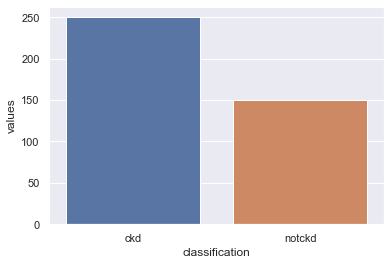

In [13]:
# Check label imbalance 
temp = df_imputed['classification'].value_counts()
temp_df = pd.DataFrame({'classification' : temp.index, 'values' : temp.values})
print(sns.barplot(x='classification', y = 'values', data=temp_df))

In [14]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              400 non-null    object
 1   age             400 non-null    object
 2   bp              400 non-null    object
 3   sg              400 non-null    object
 4   al              400 non-null    object
 5   su              400 non-null    object
 6   rbc             400 non-null    object
 7   pc              400 non-null    object
 8   pcc             400 non-null    object
 9   ba              400 non-null    object
 10  bgr             400 non-null    object
 11  bu              400 non-null    object
 12  sc              400 non-null    object
 13  sod             400 non-null    object
 14  pot             400 non-null    object
 15  hemo            400 non-null    object
 16  pcv             400 non-null    object
 17  wc              400 non-null    object
 18  rc        

In [15]:
for i in df.select_dtypes(exclude=['object']).columns:
    df_imputed[i] = df_imputed[i].apply(lambda x :float(x))

In [16]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    float64
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    object 
 17  wc              400 non-null    obj

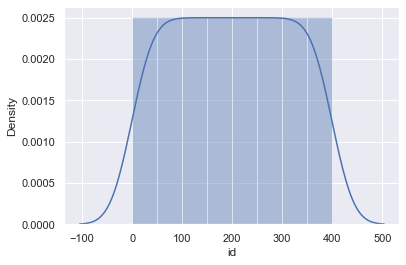

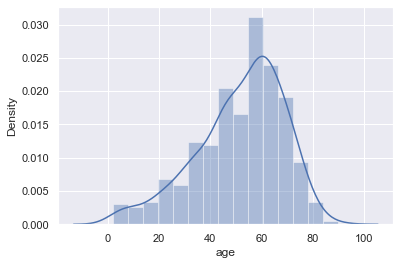

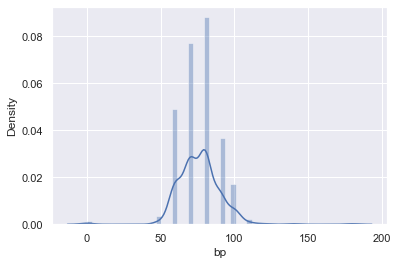

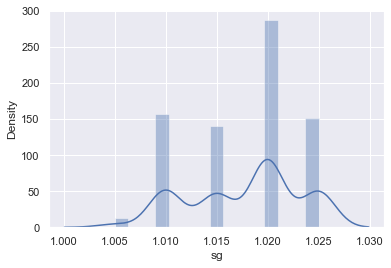

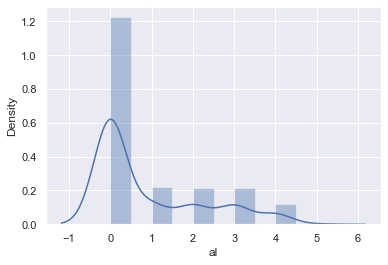

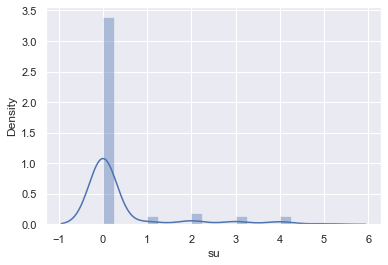

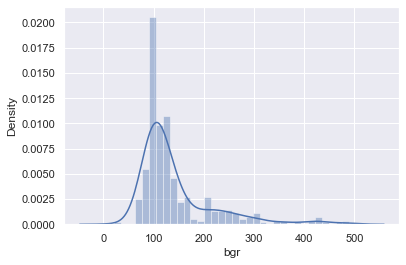

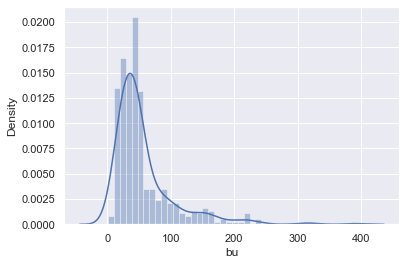

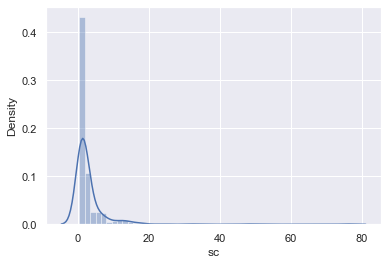

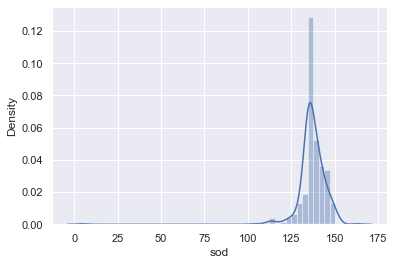

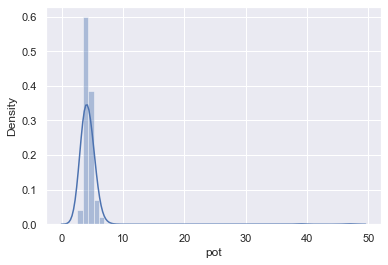

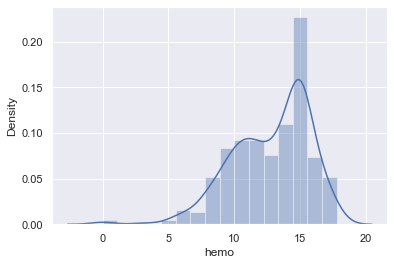

In [17]:
# Find the distribution of the dataset
def distplots(col):
    sns.distplot(df_imputed[col])
    plt.show()
    
for i in list(df_imputed.select_dtypes(exclude=['object']).columns)[0:]:
    distplots(i)

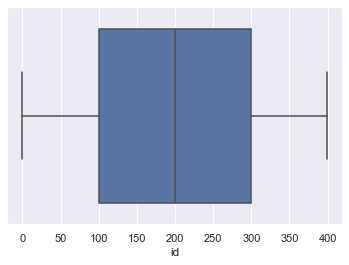

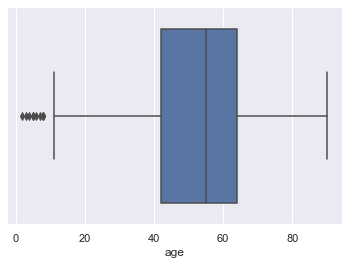

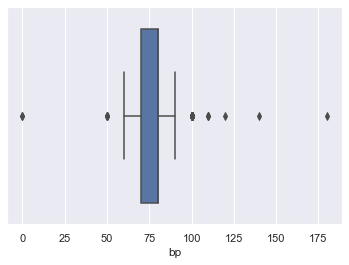

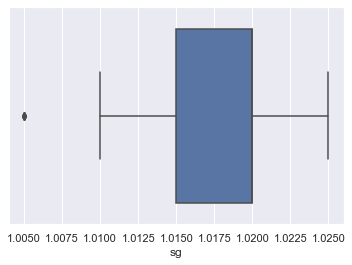

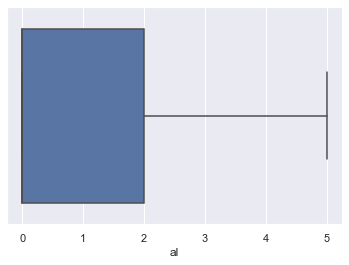

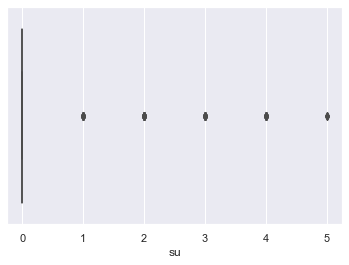

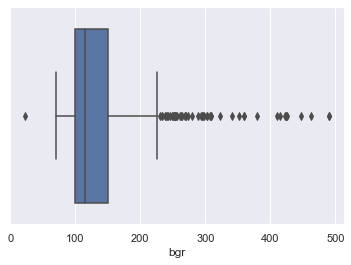

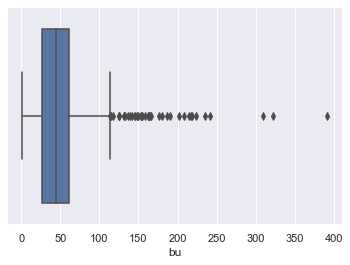

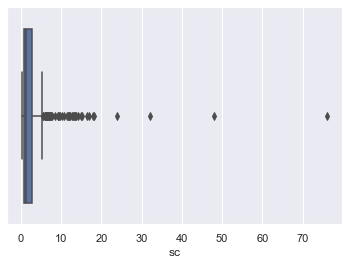

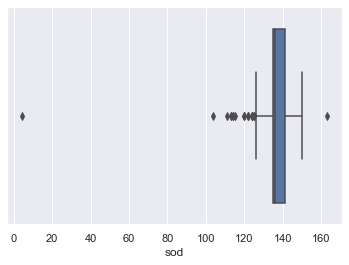

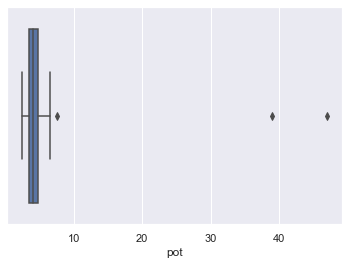

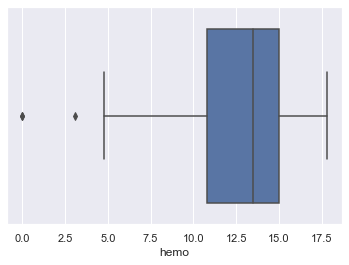

In [18]:
# Find the outlier
def boxplots(col):
    sns.boxplot(df_imputed[col])
    plt.show()
    
for i in list(df_imputed.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

In [19]:
# Label encoding to convert categorical values to numerical
from sklearn import preprocessing

df_enco = df_imputed.apply(preprocessing.LabelEncoder().fit_transform)
df_enco

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,40,4,3,1,0,1,1,0,0,...,30,69,30,1,1,0,0,0,0,0
1,1,5,1,3,4,0,1,1,0,0,...,24,53,30,0,0,0,0,0,0,0
2,2,54,4,1,2,3,1,1,0,0,...,17,67,30,0,1,0,1,0,1,0
3,3,40,3,0,4,0,1,0,1,0,...,18,59,17,1,0,0,1,1,1,0
4,4,43,0,1,2,0,1,1,0,0,...,21,65,24,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,47,4,3,0,0,1,1,0,0,...,33,59,27,0,0,0,0,0,0,1
396,396,34,3,4,0,0,1,1,0,0,...,40,69,40,0,0,0,0,0,0,1
397,397,8,4,3,0,0,1,1,0,0,...,35,58,32,0,0,0,0,0,0,1
398,398,11,2,4,0,0,1,1,0,0,...,37,64,37,0,0,0,0,0,0,1


In [20]:
df_enco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              400 non-null    int64
 1   age             400 non-null    int64
 2   bp              400 non-null    int64
 3   sg              400 non-null    int64
 4   al              400 non-null    int64
 5   su              400 non-null    int64
 6   rbc             400 non-null    int32
 7   pc              400 non-null    int32
 8   pcc             400 non-null    int32
 9   ba              400 non-null    int32
 10  bgr             400 non-null    int64
 11  bu              400 non-null    int64
 12  sc              400 non-null    int64
 13  sod             400 non-null    int64
 14  pot             400 non-null    int64
 15  hemo            400 non-null    int64
 16  pcv             400 non-null    int32
 17  wc              400 non-null    int32
 18  rc              400 non-null  

<AxesSubplot:>

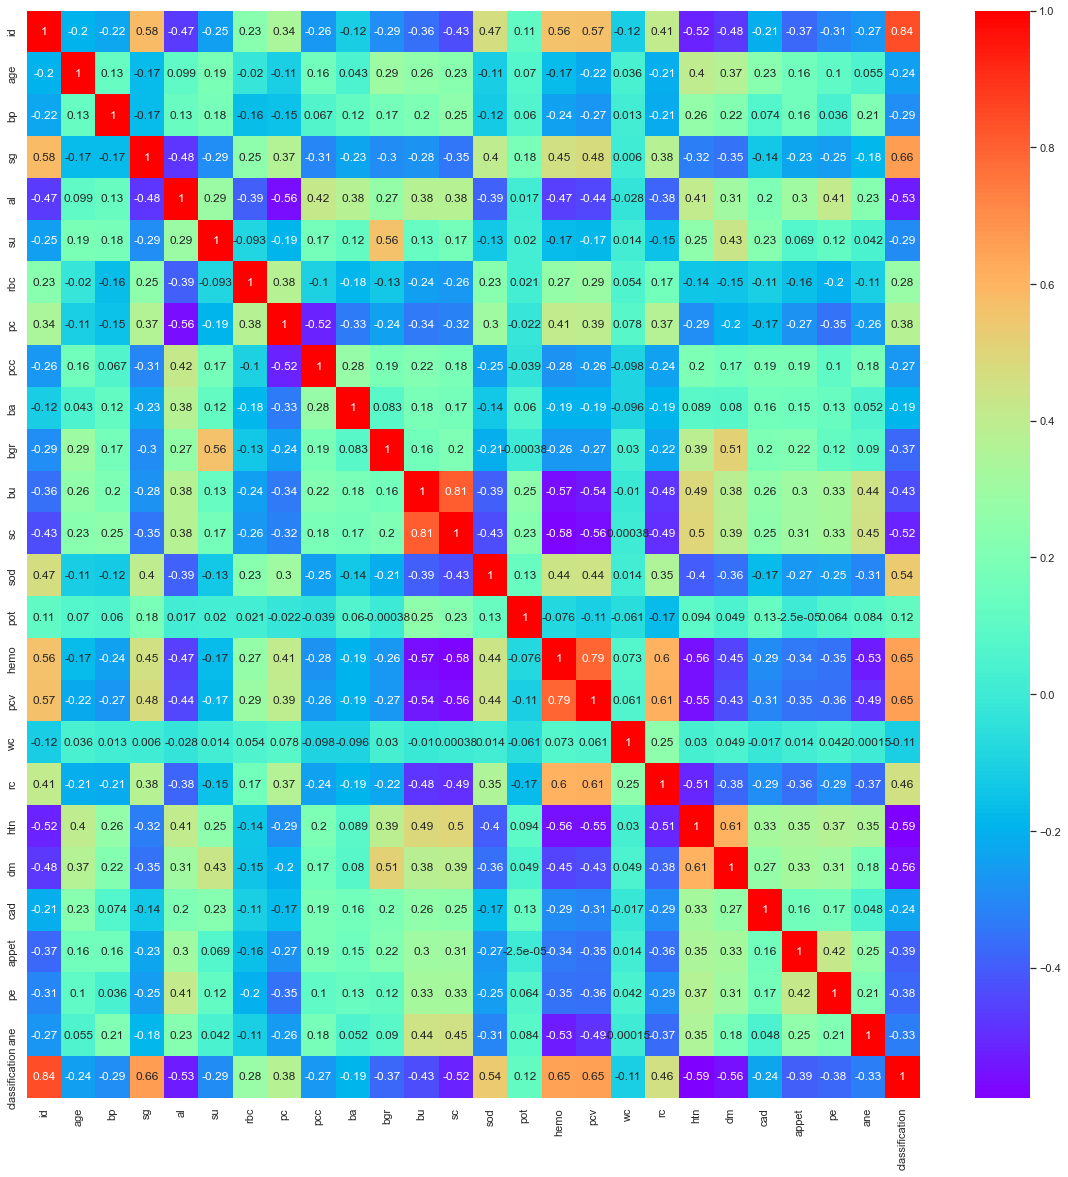

In [21]:
# Finding correlation
plt.figure(figsize=(20,20))
corr = df_enco.corr()
sns.heatmap(corr, annot=True, cmap='rainbow')

In [22]:
df_enco.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [23]:
# seperate independent and dependent variables and drop the ID column

x = df_enco.drop(['id','classification'], axis=1)
y = df_enco[['classification']]

In [24]:
x.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,40,4,3,1,0,1,1,0,0,48,...,90,30,69,30,1,1,0,0,0,0
1,5,1,3,4,0,1,1,0,0,26,...,49,24,53,30,0,0,0,0,0,0
2,54,4,1,2,3,1,1,0,0,140,...,32,17,67,30,0,1,0,1,0,1
3,40,3,0,4,0,1,0,1,0,44,...,48,18,59,17,1,0,0,1,1,1
4,43,0,1,2,0,1,1,0,0,33,...,52,21,65,24,0,0,0,0,0,0


In [25]:
y.head()

,classification
0,0
1,0
2,0
3,0
4,0


In [26]:
y.value_counts()

classification
0                 250
1                 150
dtype: int64

In [27]:
y.value_counts()/len(y)*100

classification
0                 62.5
1                 37.5
dtype: float64

In [28]:
# balance the dataset 
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
print(Counter(y))

Counter({'classification': 1})


In [29]:
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x, y)
print(Counter(y_ros))

Counter({'classification': 1})


In [30]:
print(y.value_counts())
print()
print(y_ros.value_counts())

classification
0                 250
1                 150
dtype: int64

classification
0                 250
1                 250
dtype: int64


In [31]:
x_ros.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000
mean,42.746000,3.554000,2.716000,0.720000,0.316000,0.906000,0.84800,0.084000,0.044000,48.286000,...,69.226000,26.676000,61.726000,27.796000,0.294000,0.274000,0.068000,0.164000,0.15200,0.120000
std,16.110885,1.228863,1.055259,1.228258,0.943358,0.292121,0.35938,0.277666,0.205301,33.858189,...,26.849221,7.932015,25.932835,8.438768,0.456048,0.446456,0.251998,0.370646,0.35938,0.325287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,32.000000,3.000000,2.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,26.000000,...,49.000000,22.000000,49.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,45.000000,4.000000,3.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,41.000000,...,76.000000,27.000000,67.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,55.000000,4.000000,3.000000,1.000000,0.000000,1.000000,1.00000,0.000000,0.000000,62.000000,...,86.000000,31.000000,87.000000,31.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
max,75.000000,10.000000,4.000000,5.000000,5.000000,1.000000,1.00000,1.000000,1.000000,145.000000,...,114.000000,41.000000,88.000000,44.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [32]:
# Feature Scaling - Normalization, Standarisation, MinMax
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1,1))
x = scaler.fit_transform(x_ros)
y = y_ros

In [33]:
x

array([[ 0.06666667, -0.2       ,  0.5       , ..., -1.        ,
        -1.        , -1.        ],
       [-0.86666667, -0.8       ,  0.5       , ..., -1.        ,
        -1.        , -1.        ],
       [ 0.44      , -0.2       , -0.5       , ...,  1.        ,
        -1.        ,  1.        ],
       ...,
       [-0.12      , -0.4       ,  0.5       , ..., -1.        ,
        -1.        , -1.        ],
       [-0.65333333, -0.6       ,  1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-0.25333333, -0.2       ,  1.        , ..., -1.        ,
        -1.        , -1.        ]])

In [34]:
y

,classification
0,0
1,0
2,0
3,0
4,0
...,...
495,1
496,1
497,1
498,1


# Dimension Reduction - Principal Component Analysis (PCA)

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA(0.95)
x_pca = pca.fit_transform(x)
print(x.shape)
print(x_pca.shape)

(500, 24)
(500, 18)


In [37]:
# Split the data into training and test for model building
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=7)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.ensemble import VotingClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [39]:
#!pip install xgboost

In [40]:
# Applying all the model together

# LogisticRegression
logistic = LogisticRegression()
lr = logistic.fit(x_train, y_train)
y_pred_lr = logistic.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# DecisionTree
dtree = DecisionTreeClassifier()
dt = dtree.fit(x_train, y_train)
y_pred_dt = dtree.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# RandomForest
rfmodel = RandomForestClassifier()
rf = rfmodel.fit(x_train, y_train)
y_pred_rf = rfmodel.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# BaggingClassifier
bagg = BaggingClassifier()
bg = bagg.fit(x_train, y_train)
y_pred_bg = bagg.predict(x_test)
accuracy_bg = accuracy_score(y_test, y_pred_bg)

# AdaBoostClassifier
ada = AdaBoostClassifier()
ad = ada.fit(x_train, y_train)
y_pred_ad = ada.predict(x_test)
accuracy_ad = accuracy_score(y_test, y_pred_ad)

# GradientBoostingClassifier
gdb = GradientBoostingClassifier()
gd = gdb.fit(x_train, y_train)
y_pred_gd = gdb.predict(x_test)
accuracy_gd = accuracy_score(y_test, y_pred_gd)

# XGBClassifier = RF + GDBoosting - lambda - regularisation, gamma - autoprunning, eta - learning optimization rate
xgb = XGBClassifier()
xg = xgb.fit(x_train, y_train)
y_pred_xg = xgb.predict(x_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)


# SVM
svc = SVC()
sv = svc.fit(x_train, y_train)
y_pred_sv = svc.predict(x_test)
accuracy_sv = accuracy_score(y_test, y_pred_sv)             
                             
                             
# KNN
knn = KNeighborsClassifier()
kn = knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# GaussianNB
naive_gb = GaussianNB()
ngb = naive_gb.fit(x_train, y_train)
y_pred_ngb = naive_gb.predict(x_test)
accuracy_ngb = accuracy_score(y_test, y_pred_ngb) 

# BernoulliNB
naive_bn = BernoulliNB()
nbr = naive_bn.fit(x_train, y_train)
y_pred_nbr = naive_bn.predict(x_test)
accuracy_nbr = accuracy_score(y_test, y_pred_nbr) 

In [41]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

In [42]:
evc = VotingClassifier(estimators=[('lr',lr),('dt',dt),('rf', rf),('bg', bg),('ad',ad),
                                  ('gd', gd),('xg', xg),('sv', sv),('kn', kn),
                                  ('ngb', ngb),('nbr', nbr)], voting='hard')

model_evc = evc.fit(x_train, y_train)
pred_evc = evc.predict(x_test)
accuracy_evc = accuracy_score(y_test, pred_evc)

              Method Used  Accuracy
0      LogisticRegression      0.98
1            DecisionTree      1.00
2            RandomForest      1.00
3                 Bagging      0.99
4                Adaboost      1.00
5        GradientBoosting      1.00
6                 XGBoost      1.00
7           SupportVector      0.99
8       KNearestNeighbors      0.98
9      NaiveBayesGaussian      1.00
10  NaiveBayesBernoullies      0.87
11       VotingClassifier      1.00
AxesSubplot(0.125,0.125;0.775x0.755)


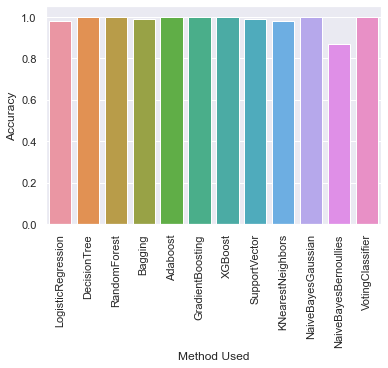

In [43]:
list1 = ['LogisticRegression','DecisionTree','RandomForest','Bagging','Adaboost',
         'GradientBoosting', 'XGBoost','SupportVector','KNearestNeighbors',
         'NaiveBayesGaussian','NaiveBayesBernoullies','VotingClassifier']

list2 = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_bg,accuracy_ad, accuracy_gd, 
         accuracy_xg, accuracy_sv, accuracy_knn, accuracy_ngb, accuracy_nbr, accuracy_evc]

list3 = [logistic, dtree, rfmodel, bagg, ada, gdb, xgb, svc, knn, naive_gb,naive_bn, evc ]

final_accuracy = pd.DataFrame({'Method Used': list1, "Accuracy": list2})
print(final_accuracy)

charts = sns.barplot(x="Method Used", y = 'Accuracy', data=final_accuracy)
charts.set_xticklabels(charts.get_xticklabels(), rotation=90)
print(charts)

In [44]:
# GradientBoostingClassifier
gdb = GradientBoostingClassifier()
gd = gdb.fit(x_train, y_train)
y_pred_gd_train = gdb.predict(x_train)
y_pred_gd_test = gdb.predict(x_test)
accuracy_gd_test = accuracy_score(y_test, y_pred_gd_test)
accuracy_gd_train = accuracy_score(y_train, y_pred_gd_train)
print(accuracy_gd_train)
print()
print(accuracy_gd_test)

1.0

1.0


In [45]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(gdb, x_train, y_train, cv=15)
test_accuracy = cross_val_score(gdb, x_test, y_test, cv=15)
print(training_accuracy[9])
print(test_accuracy[7])

0.9629629629629629
0.8571428571428571


In [47]:
# RandomForest
rfmodel = RandomForestClassifier()
rf = rfmodel.fit(x_train, y_train)
y_pred_rf_test = rfmodel.predict(x_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
y_pred_rf_train = rfmodel.predict(x_train)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)



In [48]:
print(accuracy_rf_train)
print(accuracy_rf_test)

1.0
1.0


In [55]:
from sklearn.model_selection import cross_val_score
cv_training_accuracy = cross_val_score(rf, x_train, y_train, cv=15)
cv_test_accuracy = cross_val_score(rf, x_test, y_test, cv=15)

In [56]:
print(cv_training_accuracy)
print(cv_test_accuracy)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [57]:
cv_test_accuracy

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [58]:
cv_training_accuracy

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [60]:
# LogisticRegression
logistic = LogisticRegression()
lr = logistic.fit(x_train, y_train)
y_pred_lr_train = logistic.predict(x_train)
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)
y_pred_lr_test = logistic.predict(x_test)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
print(accuracy_lr_train)
print(accuracy_lr_test)

0.995
0.98


In [61]:
from sklearn.model_selection import cross_val_score
cv_training_accuracy = cross_val_score(lr, x_train, y_train, cv=15)
cv_test_accuracy = cross_val_score(rf, x_test, y_test, cv=15)

In [62]:
cv_test_accuracy

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [63]:
cv_training_accuracy 

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.96296296,
       0.96153846, 1.        , 1.        , 1.        , 0.92307692])

In [64]:
knn = KNeighborsClassifier()
kn = knn.fit(x_train, y_train)
y_pred_knn_train = knn.predict(x_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
y_pred_knn_test = knn.predict(x_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print(accuracy_knn_train)
print(accuracy_knn_test)


0.9825
0.98


In [65]:
from sklearn.model_selection import cross_val_score
cv_training_accuracy = cross_val_score(knn, x_train, y_train, cv=15)
cv_test_accuracy = cross_val_score(knn, x_test, y_test, cv=15)

In [69]:
np.mean(cv_training_accuracy)

0.9648622981956316

In [71]:
np.mean(cv_test_accuracy)

0.9126984126984128